In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import seaborn as sns

In [4]:
df=pd.read_csv('datasSet/HAM10000_metadata.csv')

In [4]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [7]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [9]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [49]:
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

In [10]:
df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

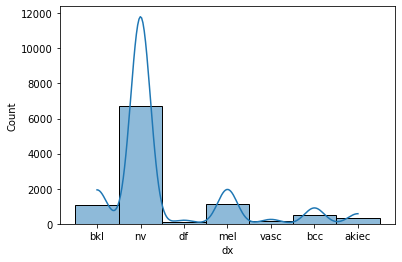

In [6]:
sns.histplot(x=df['dx'],kde=True)
plt.show()

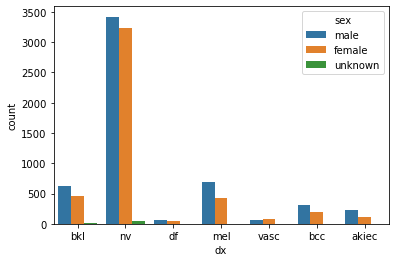

In [12]:
sns.countplot(x=df['dx'], hue=df['sex'])
plt.show()

In [16]:
def encoding(gender):
    gen = {
        'male': 0,
        'female': 1,
        'unknown': 2,
    }
    if gender == 'male':
        return 0
    elif gender == 'female':
        return 1
    else:
        return 2

df['sex'] = df['sex'].apply(encoding)


In [15]:
df.sex.value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [18]:
df.localization.value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

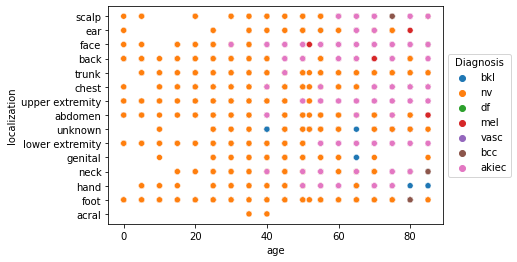

In [39]:
sns.scatterplot(x=df['age'], y=df['localization'], hue=df['dx'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Diagnosis')
plt.show()


In [40]:
df.dx_type.value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

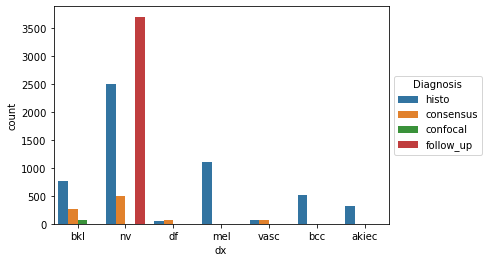

In [44]:
# sns.scatterplot(y=df['dx'], x=df['dx_type'])
sns.countplot(x=df['dx'],hue=df['dx_type'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Diagnosis')
plt.show()

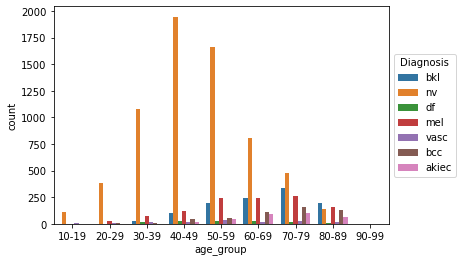

In [47]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

age_labels = [f"{age}-{age+9}" for age in age_bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


sns.countplot(x='age_group', hue='dx', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Diagnosis')
plt.show()
